<a href="https://colab.research.google.com/github/deveshsingh14/DL-NLP/blob/main/DL_ANN_regression_regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_excel("fake_reg.xlsx")
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   price     1000 non-null   float64
 1   feature1  1000 non-null   float64
 2   feature2  1000 non-null   float64
dtypes: float64(3)
memory usage: 23.6 KB


In [ ]:
df.isna().sum()

price       0
feature1    0
feature2    0
dtype: int64

In [ ]:
df.describe()

,price,feature1,feature2
count,1000.000000,1000.000000,1000.000000
mean,498.673029,1000.014171,999.979847
std,93.785431,0.974018,0.948330
min,223.346793,997.058347,996.995651
25%,433.025732,999.332068,999.316106
50%,502.382117,1000.009915,1000.002243
75%,564.921588,1000.637580,1000.645380
max,774.407854,1003.207934,1002.666308


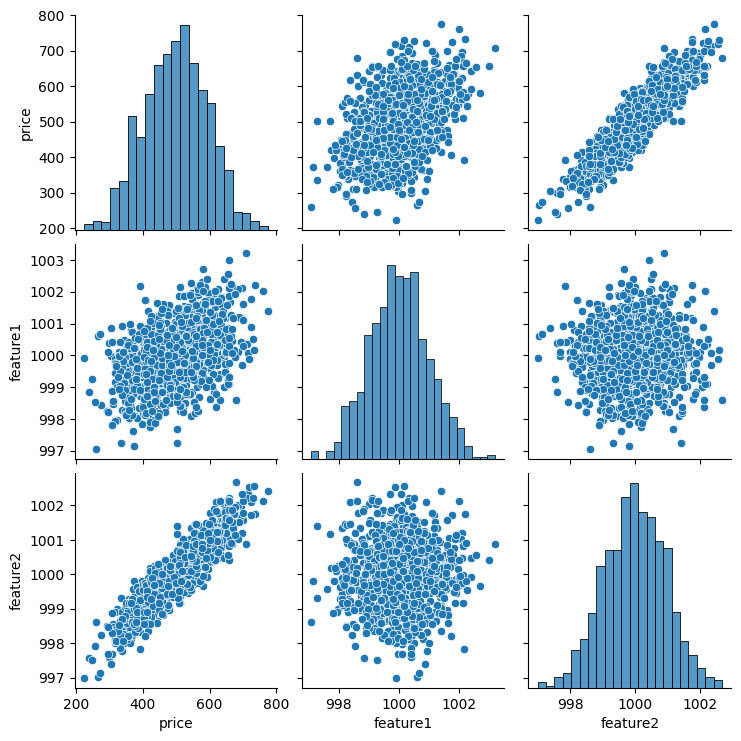

In [ ]:
sns.pairplot(df)

In [ ]:
df.corr()

,price,feature1,feature2
price,1.000000,0.444190,0.907576
feature1,0.444190,1.000000,0.030607
feature2,0.907576,0.030607,1.000000


<Axes: >

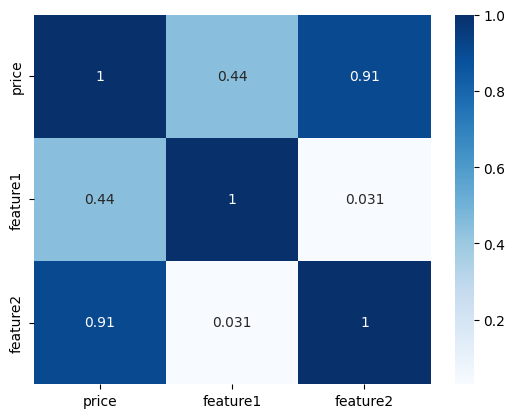

In [ ]:
sns.heatmap(df.corr(), annot=True, cmap="Blues")

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

In [ ]:
x=df.iloc[:,1:].values
y=df.iloc[:,0].values

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc=StandardScaler()
x=sc.fit_transform(x)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=1)

In [ ]:
#step1:initiallize model
ann=Sequential()
#step2: add layers
ann.add(Dense(units=4,activation="relu"))
ann.add(Dense(units=4,activation="relu"))#hidden layer
ann.add(Dense(units=4,activation="relu"))#hidden layer
ann.add(Dense(units=1)) #o/p layer with no activation as its regression

#step3:establish connection
ann.compile(optimizer="rmsprop",loss="mse")
#step4:train model
ann.fit(xtrain,ytrain,epochs=250)


Epoch 1/250
22/22 [==============================] - 1s 2ms/step - loss: 255615.2500
Epoch 2/250
22/22 [==============================] - 0s 2ms/step - loss: 255417.1406
Epoch 3/250
22/22 [==============================] - 0s 2ms/step - loss: 255203.3906
Epoch 4/250
22/22 [==============================] - 0s 2ms/step - loss: 254968.7344
Epoch 5/250
22/22 [==============================] - 0s 2ms/step - loss: 254710.9062
Epoch 6/250
22/22 [==============================] - 0s 2ms/step - loss: 254431.2031
Epoch 7/250
22/22 [==============================] - 0s 2ms/step - loss: 254121.2969
Epoch 8/250
22/22 [==============================] - 0s 2ms/step - loss: 253772.1094
Epoch 9/250
22/22 [==============================] - 0s 2ms/step - loss: 253387.2969
Epoch 10/250
22/22 [==============================] - 0s 2ms/step - loss: 252964.4062
Epoch 11/250
22/22 [==============================] - 0s 2ms/step - loss: 252489.1406
Epoch 12/250
22/22 [==============================] - 0s 2ms/st

In [ ]:
lossdf=pd.DataFrame(ann.history.history)
lossdf.head()

,loss
0,255615.250000
1,255417.140625
2,255203.390625
3,254968.734375
4,254710.906250


In [ ]:
lossdf.tail()

,loss
245,23.250553
246,23.786821
247,23.909782
248,23.223179
249,23.880695


<Axes: >

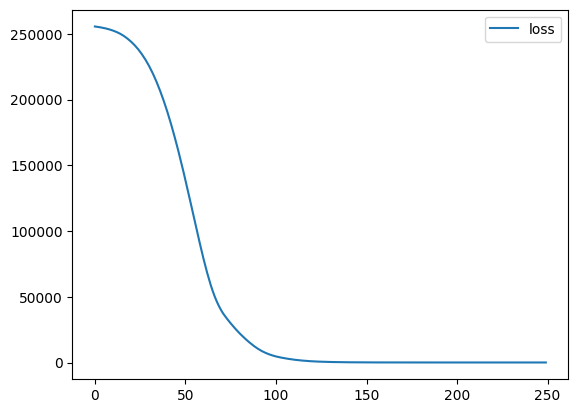

In [ ]:
lossdf.plot()

In [ ]:
ann.evaluate(xtrain,ytrain)

22/22 [==============================] - 0s 2ms/step - loss: 23.0410


23.040996551513672

In [ ]:
ann.evaluate(xtest,ytest)

10/10 [==============================] - 0s 2ms/step - loss: 29.0462


29.046178817749023

In [ ]:
ypred=ann.predict(xtest)

10/10 [==============================] - 0s 2ms/step


In [ ]:
dic={"Actual y":ytest,"predicted y":ypred.flatten()}
df1=pd.DataFrame(dic)

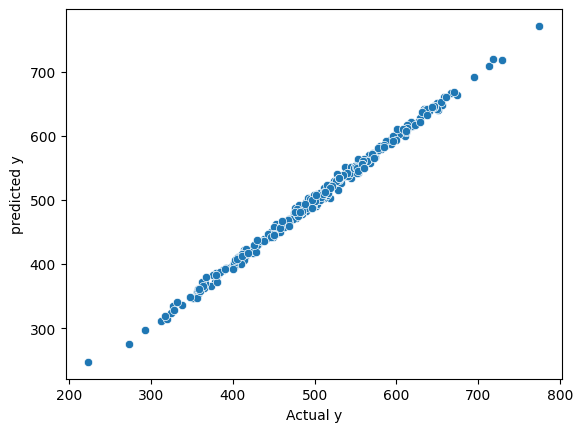

In [ ]:
sns.scatterplot(x="Actual y",y="predicted y",data=df1)
plt.show()

In [ ]:
#if it shows linear graph then model is good

from sklearn.metrics import mean_squared_error
print(f"MSE={mean_squared_error(ytest,ypred)}")
print(f"RMSE={np.sqrt(mean_squared_error(ytest,ypred))}")

MSE=29.04618907001171
RMSE=5.3894516483601285


In [ ]:
newdata=[[998,1000]]
newdata=sc.transform(newdata)
ann.predict(newdata)

1/1 [==============================] - 0s 25ms/step


array([[419.68774]], dtype=float32)

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
ann.save("fakereg_model")

In [ ]:
storedmodel=load_model("fakereg_model")

In [ ]:
storedmodel.predict(newdata)

1/1 [==============================] - 0s 74ms/step


array([[419.68774]], dtype=float32)